# Machine Learning
## Lab 03 | KFold Cross Validation and ROC AUC
This is the codesheet for lab assignment dated September 8, 2020.  The task is to work with KFold Cross Validation and ROC AUC for KNN

## PART A:  k-fold Cross Validation

#### Load Data

In [1]:
from pandas import read_csv

dataset_url = "https://raw.githubusercontent.com/sayoojsamuel/MachineLearning/master/labs/lab-01/diabetes_dataset.csv"
data = read_csv(dataset_url)
colnames=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'] 
print(data.shape) 

(768, 9)


In [2]:
arr = data.values
X = features = arr[:,0:8]
Y = outcome = arr[:,8]

#### Split Test Train sets


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_test)

[[  3.     61.     82.    ...  34.4     0.243  46.   ]
 [  3.    132.     80.    ...  34.4     0.402  44.   ]
 [  4.    117.     62.    ...  29.7     0.38   30.   ]
 ...
 [ 12.    100.     84.    ...  30.      0.488  46.   ]
 [  2.    112.     78.    ...  39.4     0.175  24.   ]
 [  2.     92.     52.    ...  30.1     0.141  22.   ]]


#### Scale data

In [4]:
from sklearn.preprocessing import MinMaxScaler

X_test = MinMaxScaler().fit_transform(X_test)
X_train = MinMaxScaler().fit_transform(X_train)

In [5]:
print(X_test)

[[0.23076923 0.30964467 0.75925926 ... 0.69215292 0.08789386 0.54347826]
 [0.23076923 0.67005076 0.74074074 ... 0.69215292 0.17578773 0.5       ]
 [0.30769231 0.59390863 0.57407407 ... 0.59758551 0.16362631 0.19565217]
 ...
 [0.92307692 0.50761421 0.77777778 ... 0.60362173 0.22332781 0.54347826]
 [0.15384615 0.56852792 0.72222222 ... 0.79275654 0.05030404 0.06521739]
 [0.15384615 0.46700508 0.48148148 ... 0.6056338  0.03150912 0.02173913]]


#### Knn


In [6]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix  
cm = confusion_matrix(Y_test, Y_pred)

print(cm)  
print(classification_report(Y_test, Y_pred))  

[[78 30]
 [16 30]]
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       108
         1.0       0.50      0.65      0.57        46

    accuracy                           0.70       154
   macro avg       0.66      0.69      0.67       154
weighted avg       0.73      0.70      0.71       154



In [12]:
print(" Total count of correct predictions = ", cm[0][0]+cm[1][1])

 Total count of correct predictions =  108


## K Fold Cross Validation


#### a)Partitioning and K-fold Cross Validation

In [ ]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) # X is the feature set and y is the target
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]

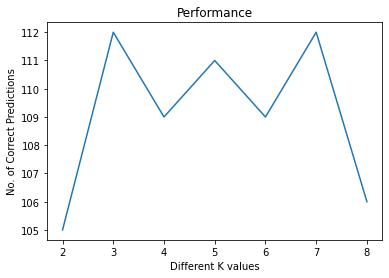

In [15]:
import matplotlib.pyplot as plt
dif_k = [2,3,4,5,6,7,8]
correct_pred = list()
for k in dif_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)#confusion matrix sum
    cm = confusion_matrix(y_test,y_pred)
    correct_pred.append(cm[0][0]+cm[1][1])
plt.plot(dif_k,correct_pred)

plt.xlabel('Different K values')
plt.ylabel('No. of Correct Predictions')

plt.title('Performance')

plt.show()


#### b)Stratified k-fold cross validation:


In [28]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in skf.split(X,Y): 
     #print("Train:", train_index, "Validation:", test_index) 
     X_train, X_test = X[train_index], X[test_index] 
     y_train, y_test = Y[train_index], Y[test_index]

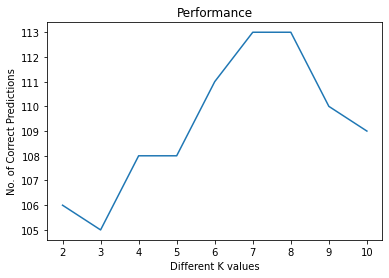

In [29]:
import matplotlib.pyplot as plt
dif_k = [2,3,4,5,6,7,8,9,10]
correct_pred = list()
for k in dif_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)#confusion matrix sum
    cm = confusion_matrix(y_test,y_pred)
    correct_pred.append(cm[0][0]+cm[1][1])
plt.plot(dif_k,correct_pred)

plt.xlabel('Different K values')
plt.ylabel('No. of Correct Predictions')

plt.title('Performance')

plt.show()

#### c)Simplek-fold cross validation with repetition.

In [37]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X):
     #print("Train:", train_index, "Validation:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = Y[train_index], Y[test_index]

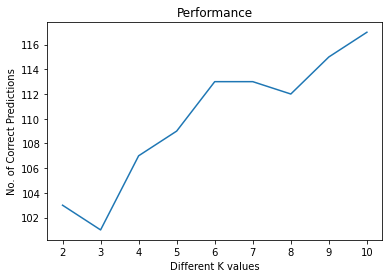

In [38]:
import matplotlib.pyplot as plt
dif_k = [2,3,4,5,6,7,8,9,10]
correct_pred = list()
for k in dif_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)#confusion matrix sum
    cm = confusion_matrix(y_test,y_pred)
    correct_pred.append(cm[0][0]+cm[1][1])
plt.plot(dif_k,correct_pred)

plt.xlabel('Different K values')
plt.ylabel('No. of Correct Predictions')

plt.title('Performance')

plt.show()

In [ ]:
# PART B | ROC AUC for KNN Models

In [41]:
k=[1,3,5,7,9,11,15]
X_train=MinMaxScaler().fit_transform(X_train)
X_test=MinMaxScaler().fit_transform(X_test)
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve,auc, roc_auc_score

roc_values =[]
aucs_values=[]
for x in k:
    classifier = KNeighborsClassifier(n_neighbors=x) 
    classifier.fit(X_train, y_train)
    y_pred =classifier.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
    
    
    #roc auc
    roc_values.append([auc(fpr,tpr),fpr,tpr])
    aucs_values.append(auc(fpr,tpr))

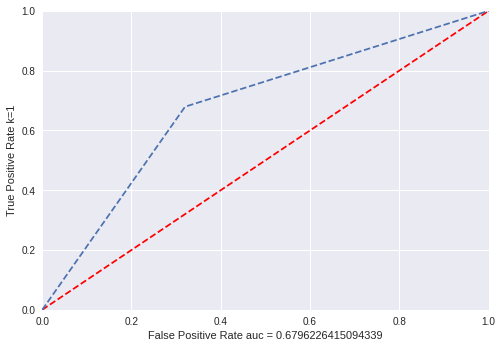

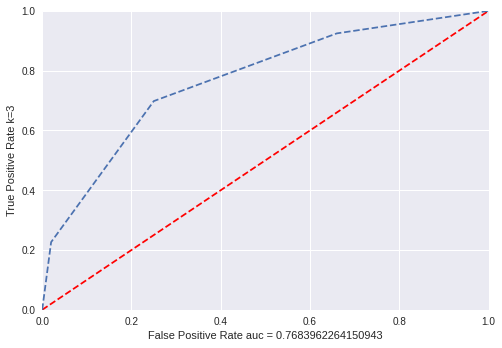

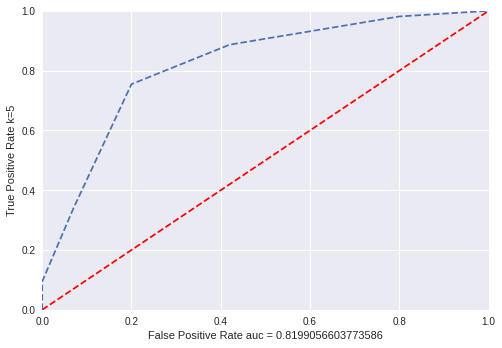

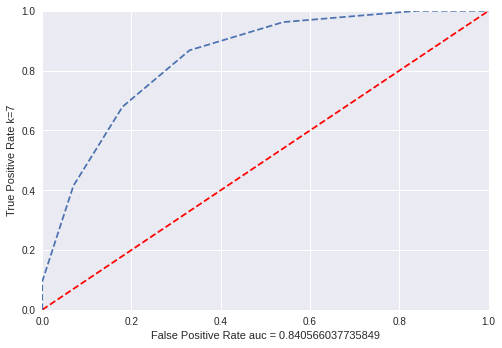

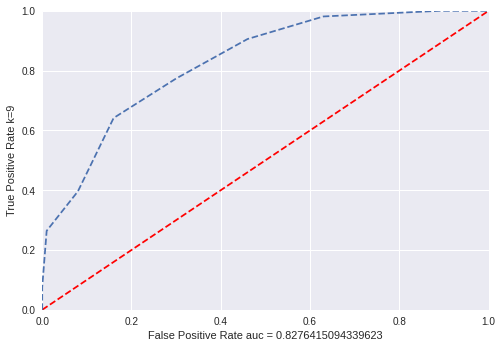

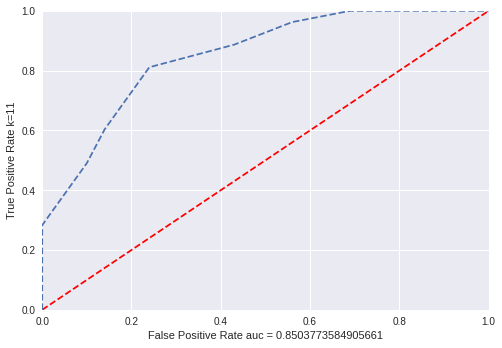

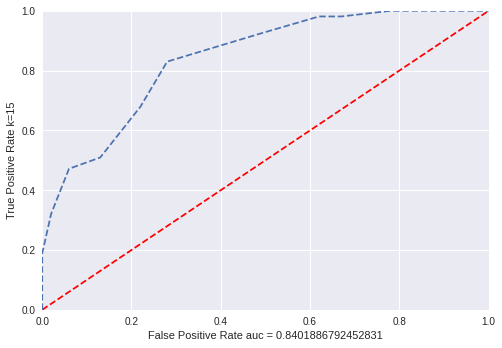

In [43]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

counter=0
for x in r:
    plt.plot([0, 1], [0, 1],'r--') 
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate'+' k='+str(k[counter])) 
    plt.xlabel('False Positive Rate'+' auc = '+str(x[0]))
    plt.plot(x[1], x[2], linestyle='--', label = 'AUC = %0.2f' %x[0]) # plot roc curves 
    plt.show();
    counter+=1